# Assignment 2

**Data sets to use: WestRoxbury_housing.csv**

* Possible points: 100

* Rename the .ipynb notebook as Assignment_2_{FirstName}_{LastName}.ipynb before submitting your notebook. Eg. Assignment_2_Vijay_Koju.ipynb

* Due Date: 04/07/2023 11:59pm

* Submit the .ipynb notebook only. There is no need to submit the data file and any other write up. All your code, and answers should be included in the notebook.

##### Include the following information:

* Name: Vinh Huynh
* UTD ID: 2021635587
* Email: vxh210013@

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1) Import the data.

In [14]:
datahouse=pd.read_csv("C:/Users/tuanv/Downloads/WestRoxbury_housing.csv")
datahouse.info()
display(datahouse)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL VALUE  5802 non-null   float64
 1   LOT SQFT     5684 non-null   float64
 2   YR BUILT     5739 non-null   float64
 3   GROSS AREA   5802 non-null   int64  
 4   LIVING AREA  5802 non-null   int64  
 5   FLOORS       5802 non-null   float64
 6   ROOMS        5802 non-null   int64  
 7   BEDROOMS     5802 non-null   int64  
 8   FULL BATH    5802 non-null   int64  
 9   HALF BATH    5802 non-null   int64  
 10  KITCHEN      5802 non-null   int64  
 11  FIREPLACE    5802 non-null   int64  
 12  REMODEL      5768 non-null   object 
dtypes: float64(4), int64(8), object(1)
memory usage: 589.4+ KB


,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938.0,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408.0,1950.0,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,7198.0,1987.0,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,6890.0,1946.0,2000,1000,1.0,5,2,1,0,1,0,None


### 2) Check if there are any missing values in any of the columns.

In [23]:
datahouse.isnull().sum()
datahouse.dtypes

TOTAL VALUE    float64
LOT SQFT       float64
YR BUILT       float64
GROSS AREA       int64
LIVING AREA      int64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL BATH        int64
HALF BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

### 3) Replace the missing values with median for numeric columns and mode for categorical column.

In [15]:
for column in datahouse.columns:
    if datahouse[column].dtype == 'object':
        # fill missing values with mode for categorical columns
        datahouse[column].fillna(datahouse[column].mode()[0], inplace=True)
    else:
        # fill missing values with median for numeric columns
        datahouse[column].fillna(datahouse[column].median(), inplace=True);
datahouse.isnull().any()

TOTAL VALUE    False
LOT SQFT       False
YR BUILT       False
GROSS AREA     False
LIVING AREA    False
FLOORS         False
ROOMS          False
BEDROOMS       False
FULL BATH      False
HALF BATH      False
KITCHEN        False
FIREPLACE      False
REMODEL        False
dtype: bool

### 4) Remove the duplicate rows (if any) from the datafame.

In [70]:
datahouse.drop_duplicates(inplace=True)
datahouse.info()
datahouse

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5799 entries, 0 to 5801
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL VALUE  5799 non-null   float64
 1   LOT SQFT     5681 non-null   float64
 2   YR BUILT     5736 non-null   float64
 3   GROSS AREA   5799 non-null   int64  
 4   LIVING AREA  5799 non-null   int64  
 5   FLOORS       5799 non-null   float64
 6   ROOMS        5799 non-null   int64  
 7   BEDROOMS     5799 non-null   int64  
 8   FULL BATH    5799 non-null   int64  
 9   HALF BATH    5799 non-null   int64  
 10  KITCHEN      5799 non-null   int64  
 11  FIREPLACE    5799 non-null   int64  
 12  REMODEL      5765 non-null   object 
dtypes: float64(4), int64(8), object(1)
memory usage: 634.3+ KB


,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938.0,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408.0,1950.0,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,7198.0,1987.0,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,6890.0,1946.0,2000,1000,1.0,5,2,1,0,1,0,None


### 5) Check the 'YR BUILT' column and see if there is any abnormal value(s). If yes, treat them appropriately.

In [30]:
yr_built_values = datahouse['YR BUILT'].unique()

abnormal_values = [v for v in yr_built_values if v < 1800 or v > 2023]
if abnormal_values:
    # replace the abnormal values with the median value
    median_yr_built = datahouse['YR BUILT'].median()
    datahouse['YR BUILT'].fillna(median_yr_built, inplace=True)
yr_built_values    

array([1880., 1945., 1890., 1957., 1910., 1950., 1954., 1935., 1900.,
       1960., 1958., 1889., 2004., 1940., 1875., 1920., 1944., 1892.,
       1896., 1906., 1925., 1963., 1915., 1990., 1995., 1996., 1907.,
       1860., 1967., 1991., 2007., 1964., 1942., 1987., 1997., 1948.,
       1930., 1928., 1999., 1946., 1955., 1968., 1934., 1983., 2001.,
       1962., 1956., 1959., 1969., 1989., 1965., 1974., 1972., 1971.,
       1970., 1978., 1984., 2003., 1911., 1980., 2005., 1986., 2002.,
       1993., 1914., 1926., 1916., 1929., 1918., 1951., 1924., 1909.,
       2006., 1905., 1943., 1961., 1992., 2008., 1988., 1904., 1966.,
       1938., 1953., 1798., 1973., 1949., 1994., 1933., 1912., 1927.,
       2011., 2000., 1908., 1931., 1921., 1923., 1975., 1976., 2009.,
       1902., 1922., 1952., 1939., 1947., 1941., 1883., 1899., 1985.,
       1894., 2010., 1895., 1845., 1917., 1850., 1903., 1936., 1981.,
          0., 1913., 1932., 1800., 1870., 1998., 1937., 1885., 1820.,
       1891., 1810.,

### 6) Perform exploratory data analysis (EDA): Univariate & Bivariate

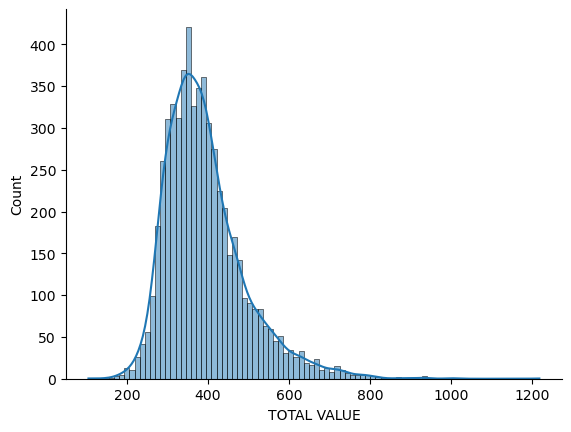

In [34]:
sns.histplot(data=datahouse, x="TOTAL VALUE", kde=True)
sns.despine()
plt.show()

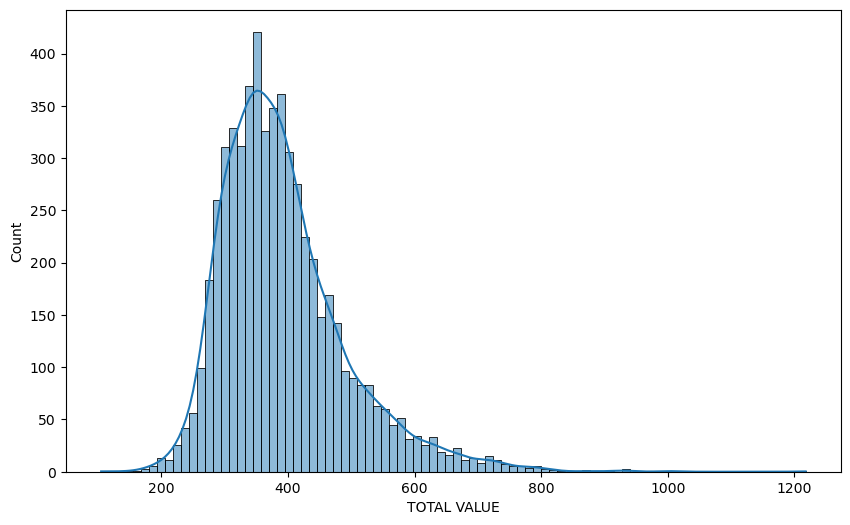

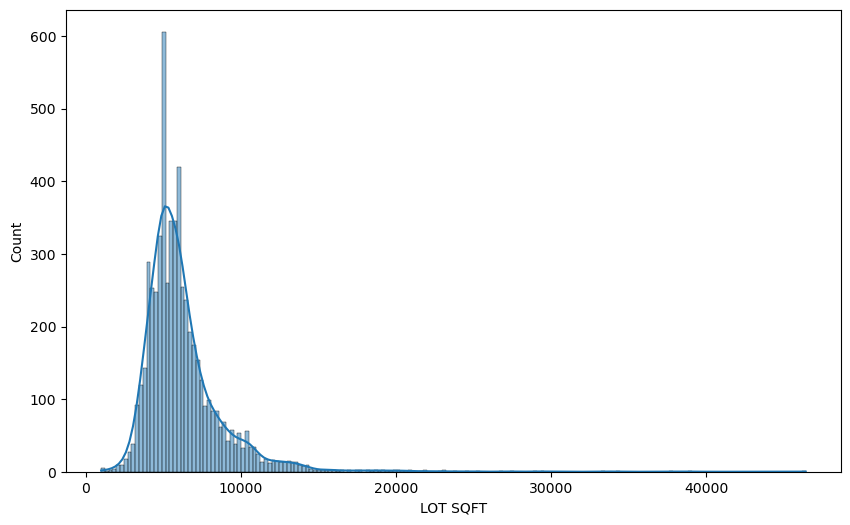

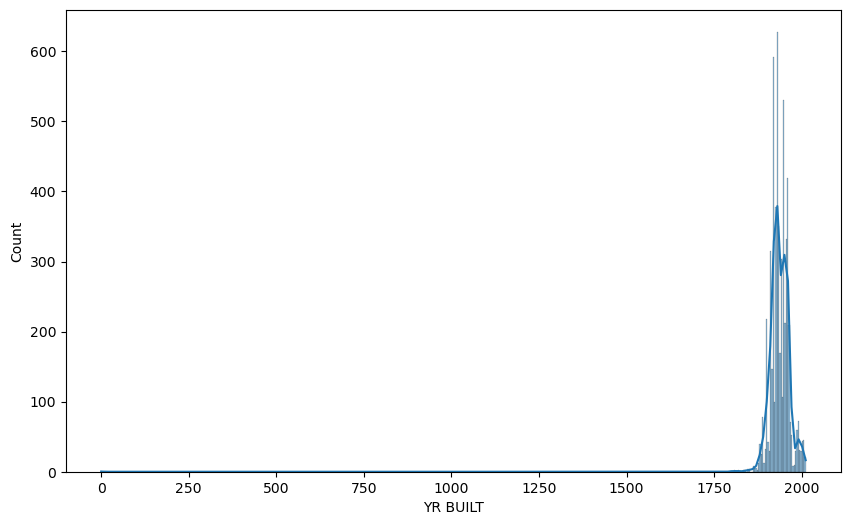

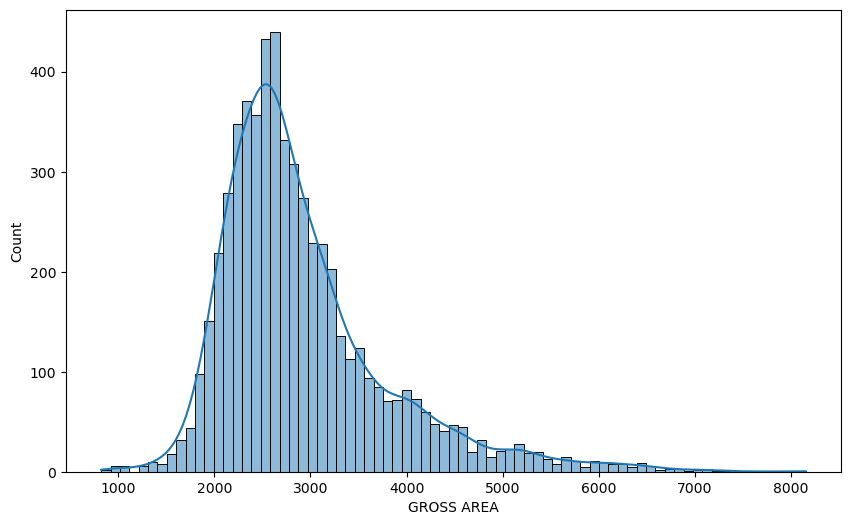

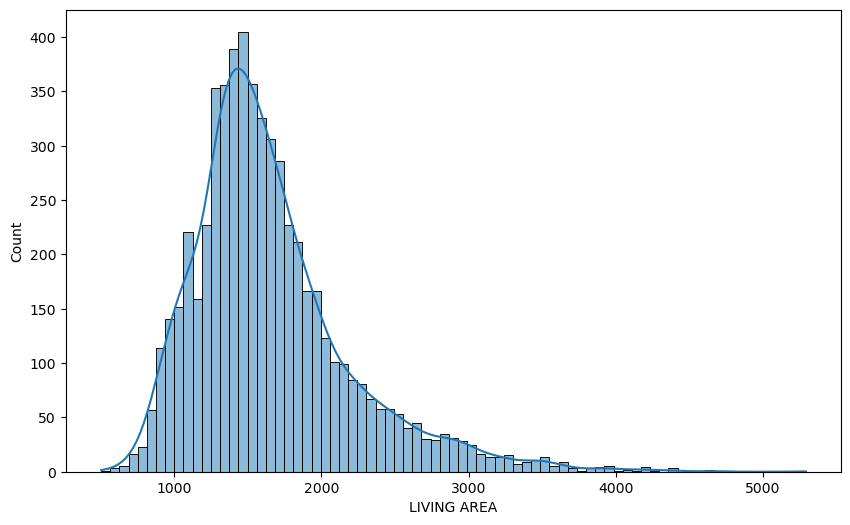

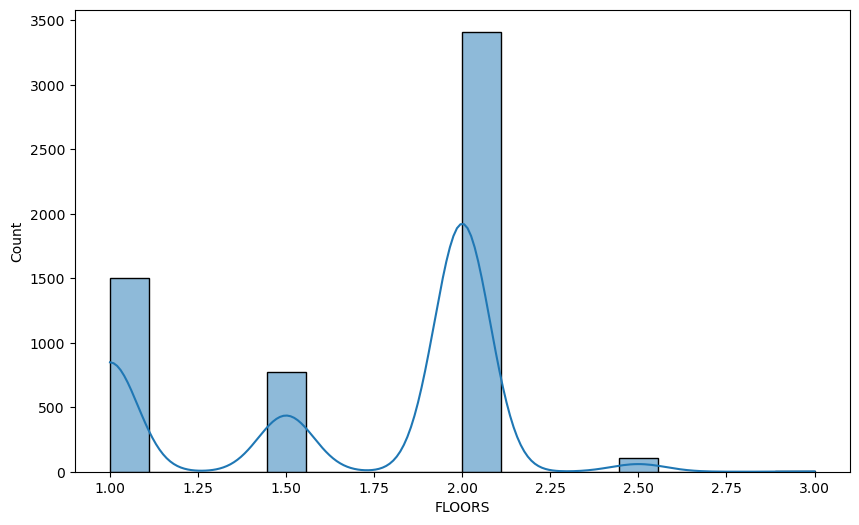

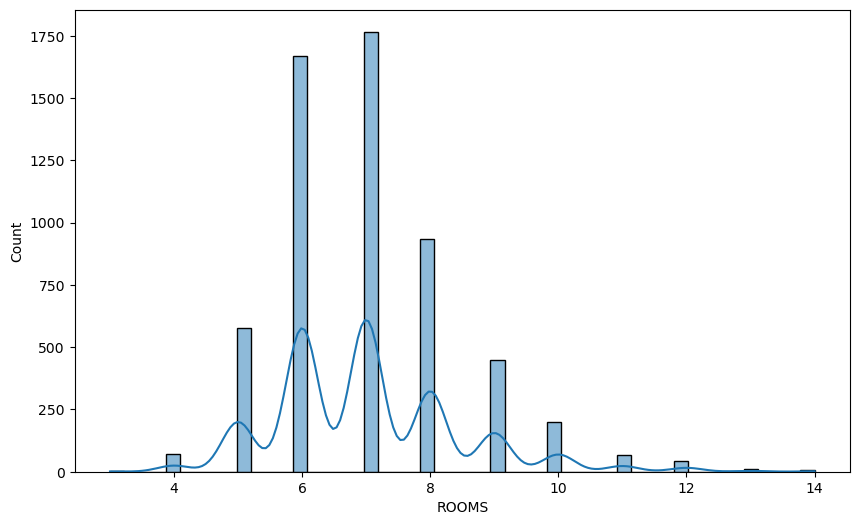

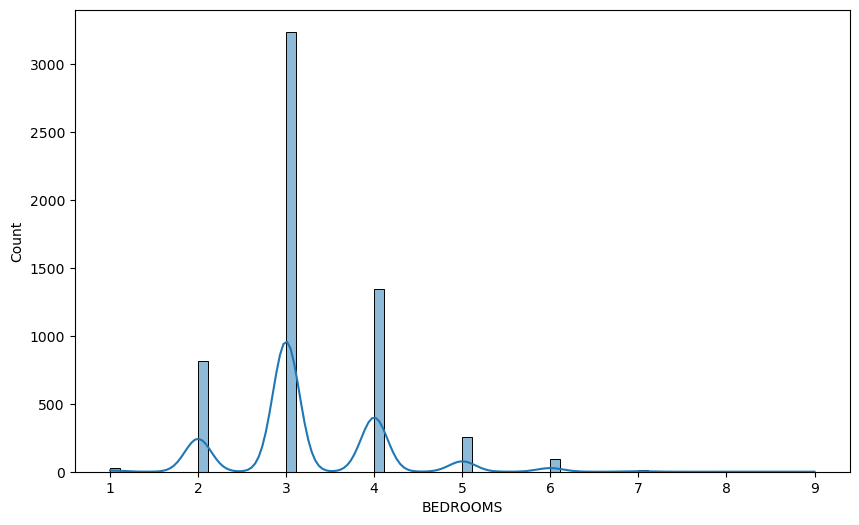

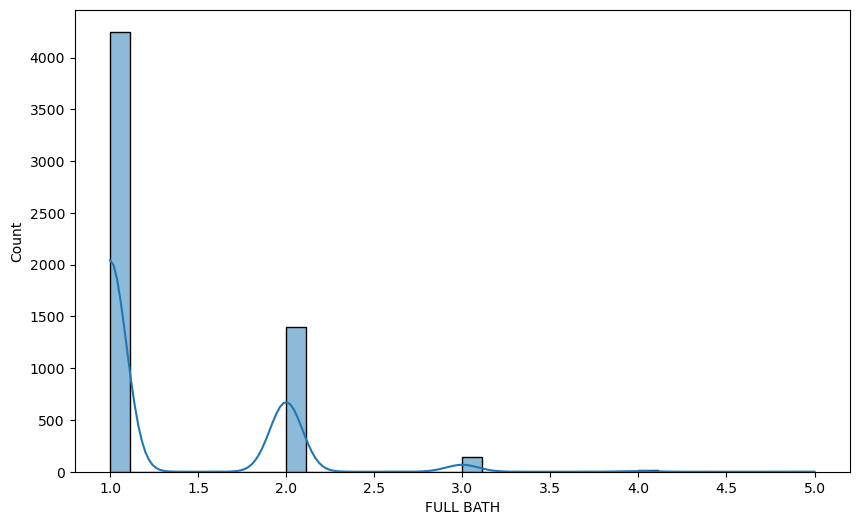

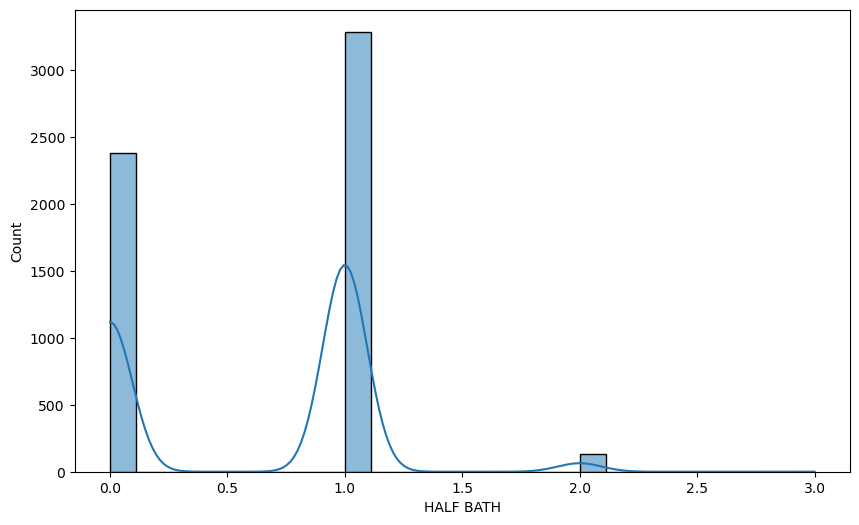

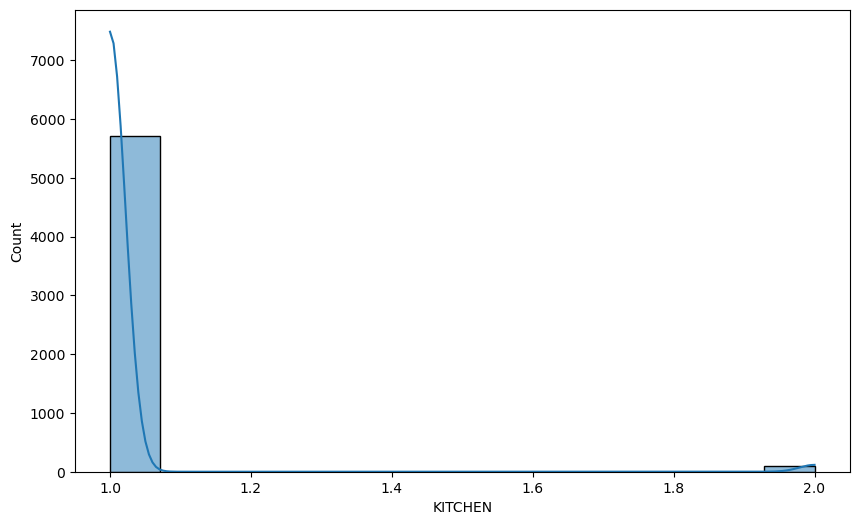

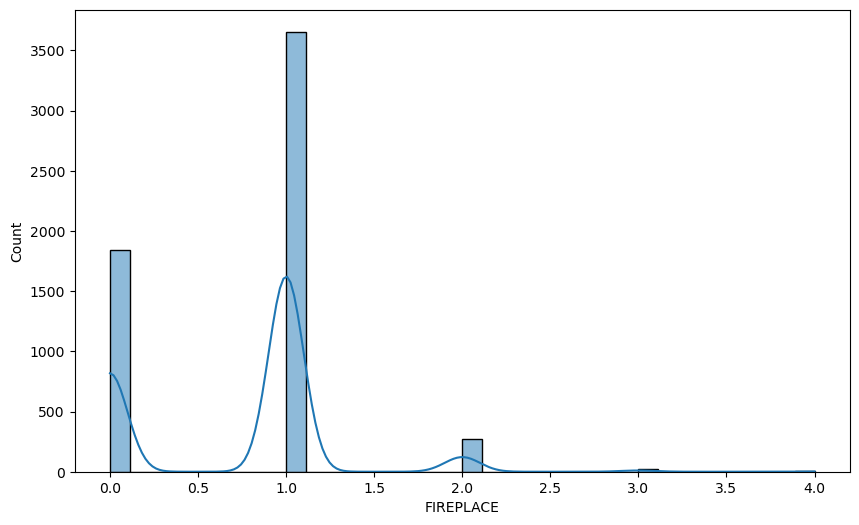

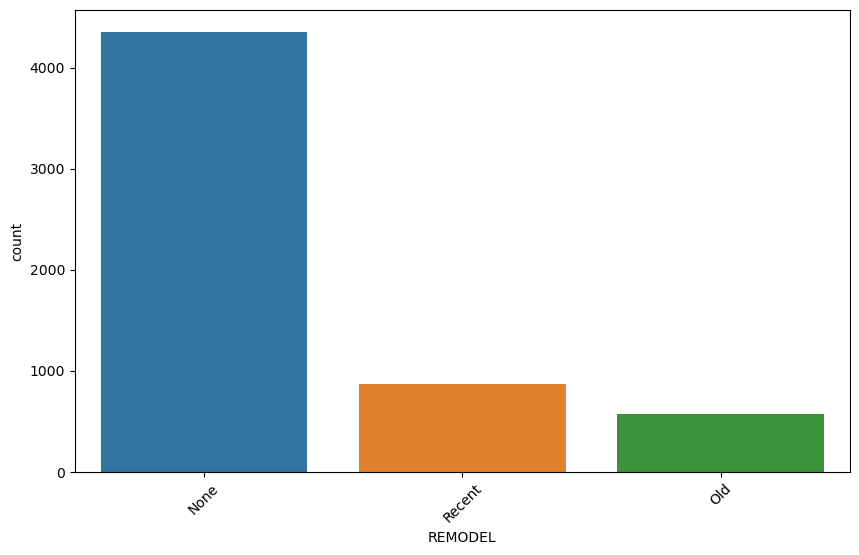

In [36]:
# Univariate:
for col in datahouse.columns:
    if datahouse[col].dtype == 'object':
        # Plot a count plot for categorical columns
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=datahouse)
        plt.xticks(rotation=45)
        plt.show()
    else:
        # Plot a histogram for numerical columns
        plt.figure(figsize=(10, 6))
        sns.histplot(x=col, data=datahouse, kde=True)
        plt.show()

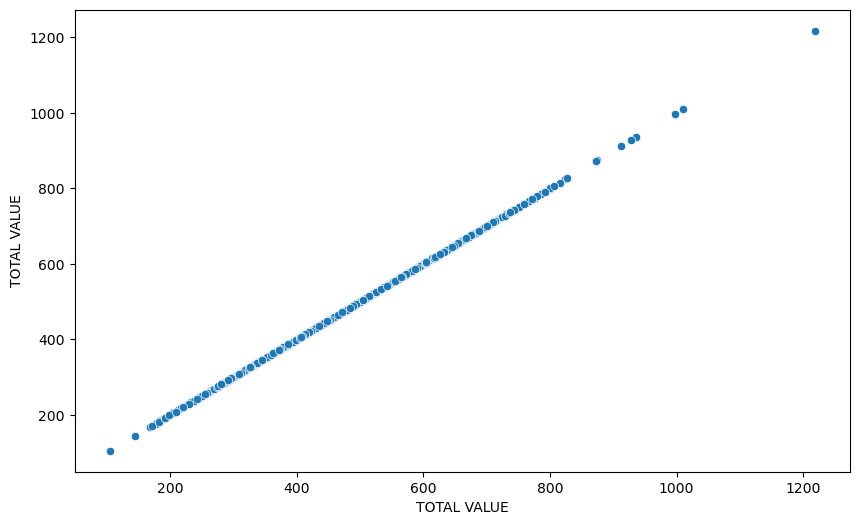

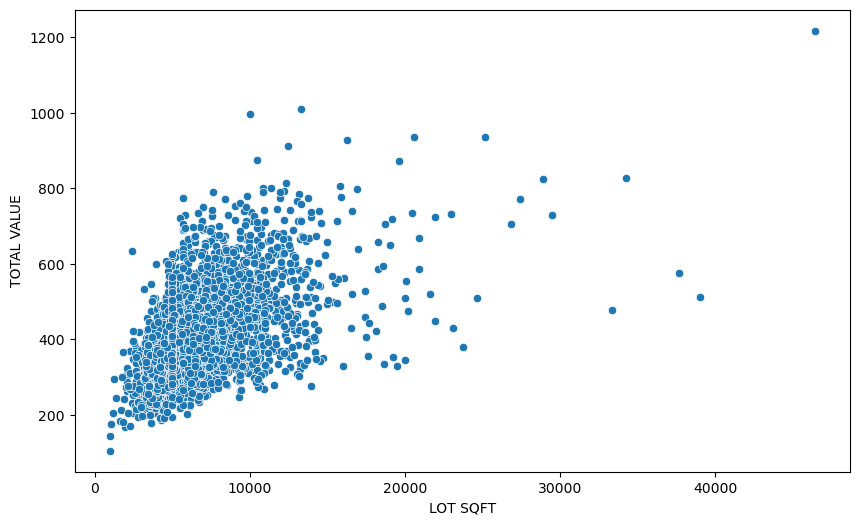

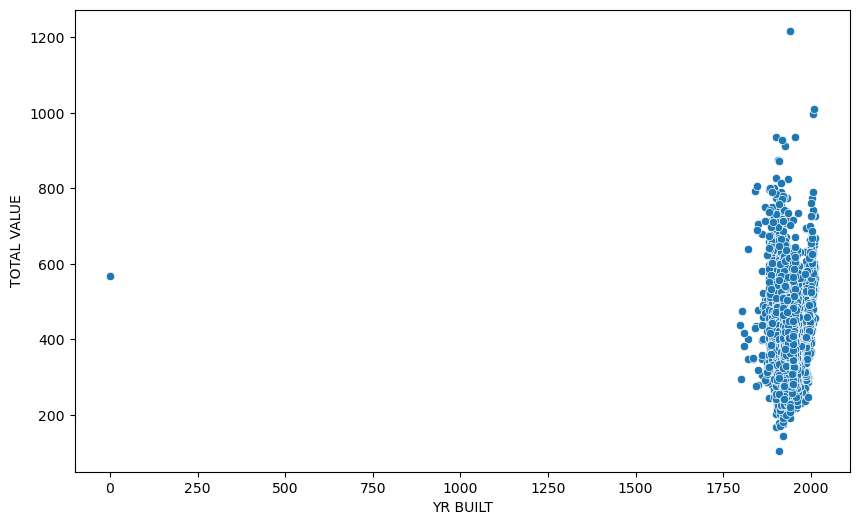

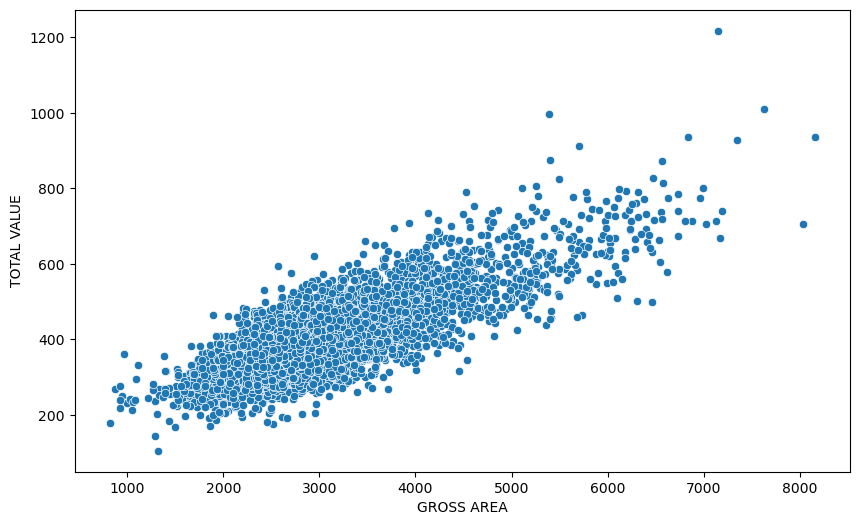

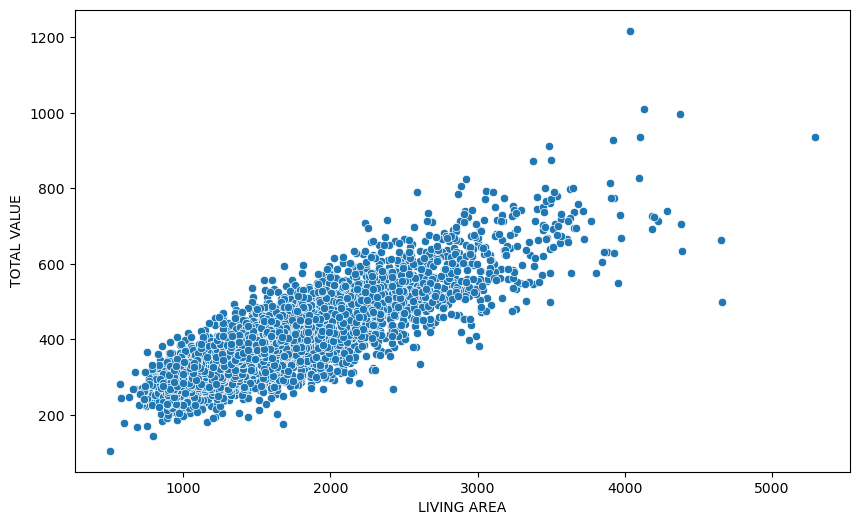

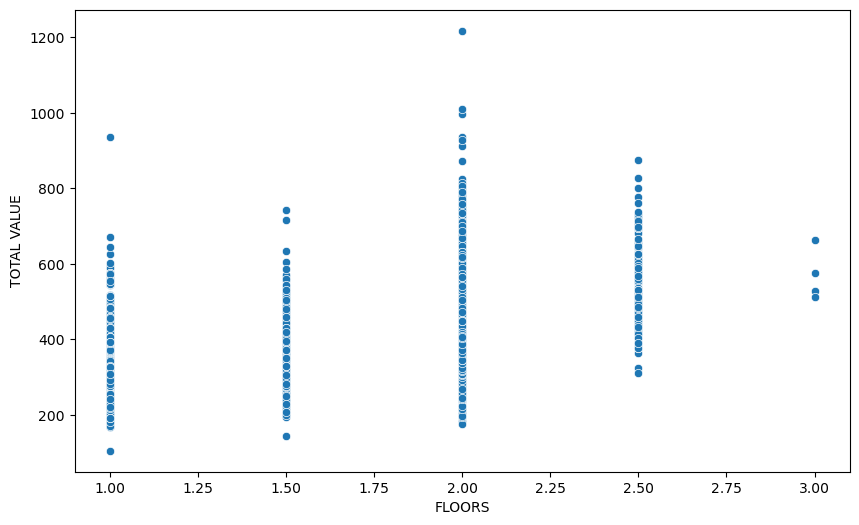

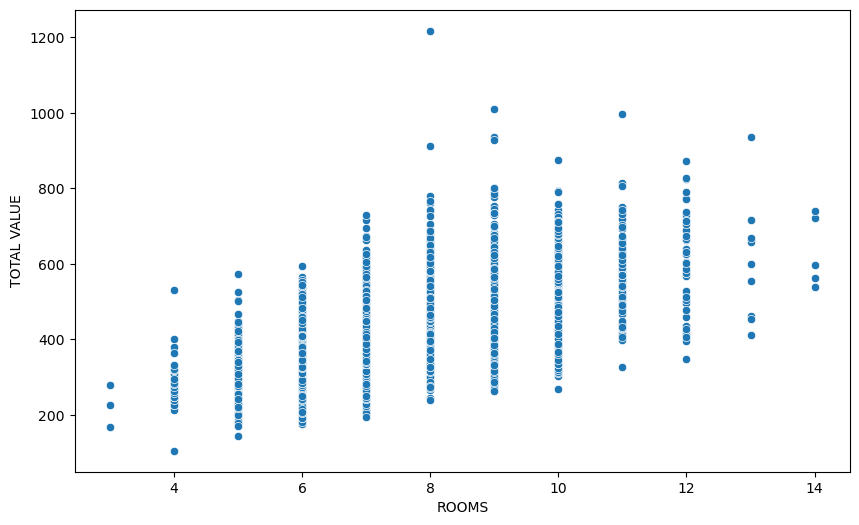

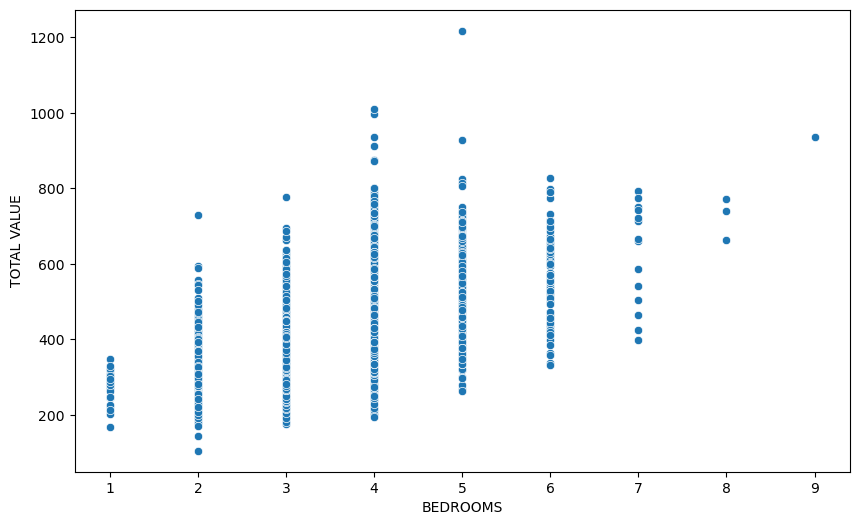

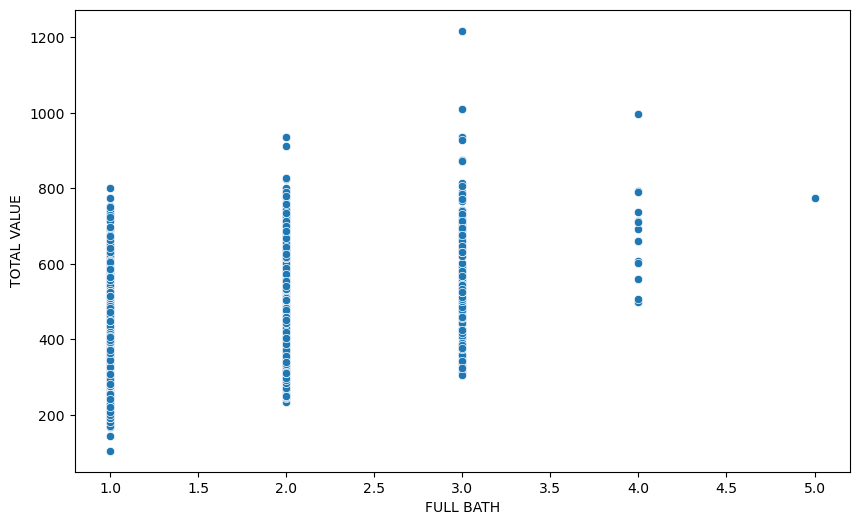

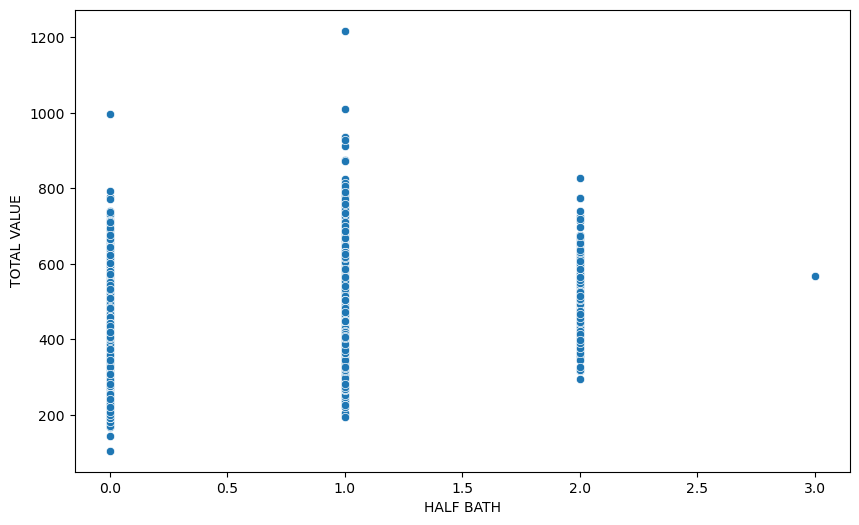

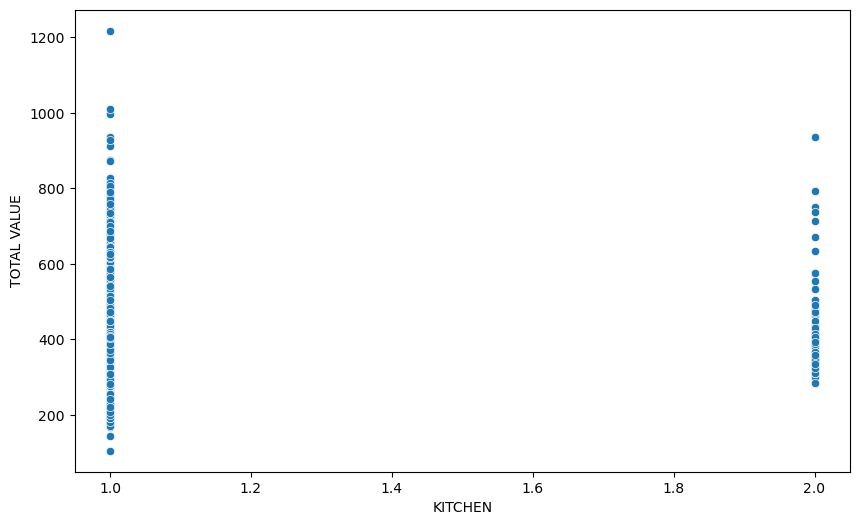

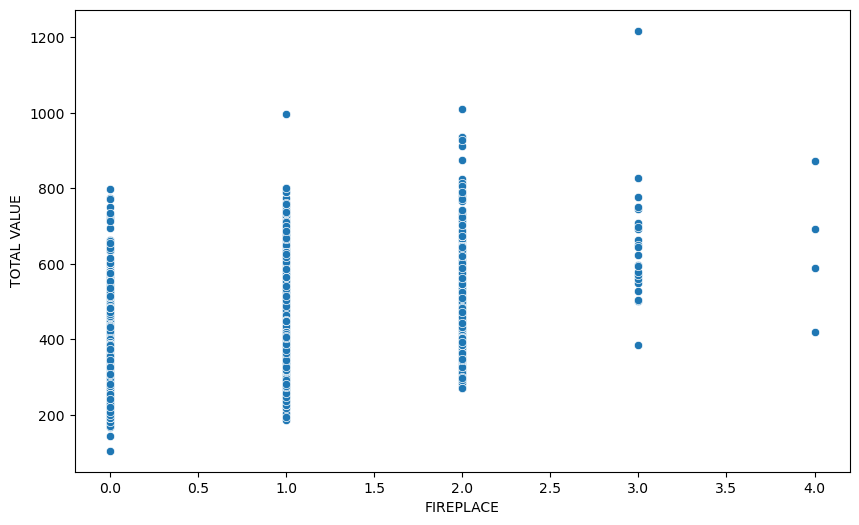

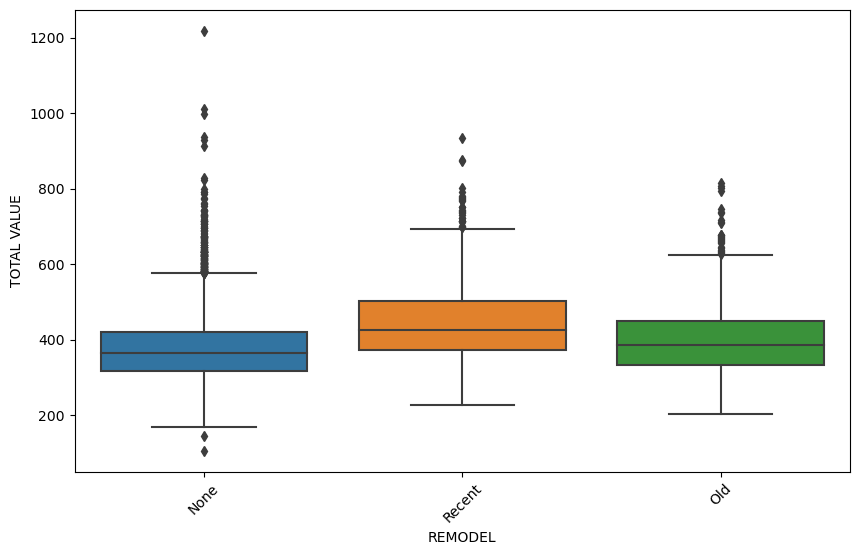

In [37]:
# Bivariate:
for col in datahouse.columns:
    if datahouse[col].dtype == 'object':
        # Plot a box plot for categorical columns vs. numerical target
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='TOTAL VALUE', data=datahouse)
        plt.xticks(rotation=45)
        plt.show()
    else:
        # Plot a scatter plot for numerical columns vs. numerical target
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=col, y='TOTAL VALUE', data=datahouse)
        plt.show()

### 7) Split the data into a training (70%) and a testing (30%) datasets. Use the training dataset to train a Linear Regression model to explain/predict the 'TOTAL VALUE' of houses using all the available features. Evaluate the performance of the model on both the training and the test dataset using R-squared.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(datahouse.drop('TOTAL VALUE', axis=1), 
                                                    datahouse['TOTAL VALUE'].astype(float), 
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
# create a dictionary to map categorical values to numeric values
mapping = {'None': 0, 'Recent': 1, 'Old': 2}

# apply the mapping to the 'category' column
datahouse['REMODEL'] = datahouse['REMODEL'].apply(lambda x: mapping[x])

In [67]:
#linear regression model on the training data
lr = LinearRegression().fit(X_train, y_train)

# Evaluate performance of the model on the training dataset using R-squared
train = r2_score(y_train, lr.predict(X_train))

# Evaluate performance of the model on the testing dataset using R-squared
test = r2_score(y_test, lr.predict(X_test))

# Print the R-squared scores
print(f'Training R-squared: {train:.4f}')
print(f'Testing R-squared: {test:.4f}')

Training R-squared: 0.8164
Testing R-squared: 0.7758


### 8) Interprete the R-squared value for your model.

In [ ]:
### The Training R-squared 0.8164 means that 81.64% variance of dependent variables can be explained by independent variables.
### There is a good fit of model to the training data.

###The Testing R-squared 0.7758 means that 77.58% variance of dependent variables can be explained by independent variables.
### There is a good ability of model to be not overfitting the unseen or new data.

### 9) Provide the interpretation of any three model coefficients.

In [68]:
import statsmodels.api as sms

# Define the predictor variables and target variable
X = datahouse.drop(['TOTAL VALUE'], axis=1)
y = datahouse['TOTAL VALUE']

# Fit a linear regression model
model = sms.OLS(y, sms.add_constant(X)).fit()

# Print the model summary
print(model.summary())

# Interpret 3 model coefficients
print('Interpretation of Model Coefficients:')
print('LOT SQFT: Holding all other variables constant, one-unit increase in lot square footage, the total value of the property increases by', round(model.params['LOT SQFT'], 4))
print('GROSS AREA: Holding all other variables constant, one-unit increase in gross area, the total value of the property increases by', round(model.params['GROSS AREA'], 4))
print('FULL BATH: Holding all other variables constant, one-unit increase in the number of full bathrooms is associated with an increase in the total value of the property by', round(model.params['FULL BATH'], 4))

                            OLS Regression Results                            
Dep. Variable:            TOTAL VALUE   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     2020.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:40:21   Log-Likelihood:                -30106.
No. Observations:                5799   AIC:                         6.024e+04
Df Residuals:                    5786   BIC:                         6.033e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.9181     34.566     -0.981      

### 10) Use KMeans clustering as a feature engineering technique to create a new feature (information about clusters) that can be included in your Linear regression model. Only use the features 'LOT SQFT' and 'YR BUILT' for your KMeans clustering analysis. 

#### 10.1) Identify the appropriate number of clusters using the Silhouette score method.

In [78]:
k_values = range(2, 10)

# calculate Silhouette scores for each value of k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(datahouse['LOT SQFT'], datahouse['YR BUILT'], cluster_labels))

# plot Silhouette scores

plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

TypeError: silhouette_score() takes 2 positional arguments but 3 were given

#### 10.2) Use the optimal # of clusters you identified above to perform KMeans clustering analysis using 'LOT SQFT' and 'YR BUILT' features on the entire dataset. Assign the clustering result as a new column in your original dataset. 

#### 10.3) Visualize the clusters.

#### 10.4) Re-train/evaluate your Linear regression model using the new dataset that includes an additional feature (cluster assignments). 

#### 10.5) Is this model better than your previous model?